### Assignment 2

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs

In [3]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=300, centers=centers, cluster_std=0.9, random_state=0
)

In [4]:
af = AffinityPropagation(damping =0.9,preference=-50).fit(X)

cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)


Estimated number of clusters: 5


[ 0.57697041 -1.19505832]
[1.82877294 1.28685489]
[0.30707553 1.48532427]
[ 1.56270831 -0.44185189]
[-1.33226365 -1.21544126]


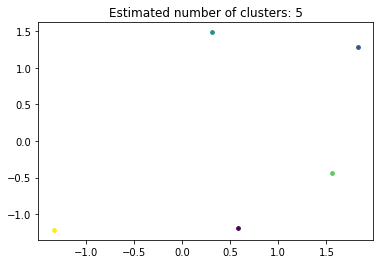

In [8]:
import matplotlib.pyplot as plt

plt.close("all")
plt.figure(1)
plt.clf()

colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, n_clusters_)))

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    print(cluster_center)
    plt.scatter(
        X[class_members, 0], X[class_members, 1], color=col["color"], marker="."
    )
    plt.scatter(
        cluster_center[0], cluster_center[1], s=14, color=col["color"], marker="o"
    )
    for x in X[class_members]:
        plt.plot(
            [cluster_center[0], x[0]], [cluster_center[1], x[1]], color=col["color"]
        )

plt.title("Estimated number of clusters: %d" % n_clusters_)

plt.show()

In [6]:
#Performance

# Rand Score
print("Rand Score: %0.3f" % metrics.rand_score(labels_true, labels))

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels, metric="sqeuclidean"))

Rand Score: 0.751
Silhouette Coefficient: 0.484


# Changed Damping parameter


For damping Value 0.50 :  7 , Silhouette Score : 0.47 , Rand Score : 0.72
For damping Value 0.55 :  7 , Silhouette Score : 0.49 , Rand Score : 0.72
For damping Value 0.60 :  7 , Silhouette Score : 0.47 , Rand Score : 0.71
For damping Value 0.65 :  6 , Silhouette Score : 0.50 , Rand Score : 0.74
For damping Value 0.70 :  5 , Silhouette Score : 0.49 , Rand Score : 0.74
For damping Value 0.75 :  5 , Silhouette Score : 0.50 , Rand Score : 0.74
For damping Value 0.80 :  5 , Silhouette Score : 0.50 , Rand Score : 0.76
For damping Value 0.85 :  4 , Silhouette Score : 0.50 , Rand Score : 0.77
For damping Value 0.90 :  5 , Silhouette Score : 0.48 , Rand Score : 0.75
For damping Value 0.95 :  5 , Silhouette Score : 0.48 , Rand Score : 0.75


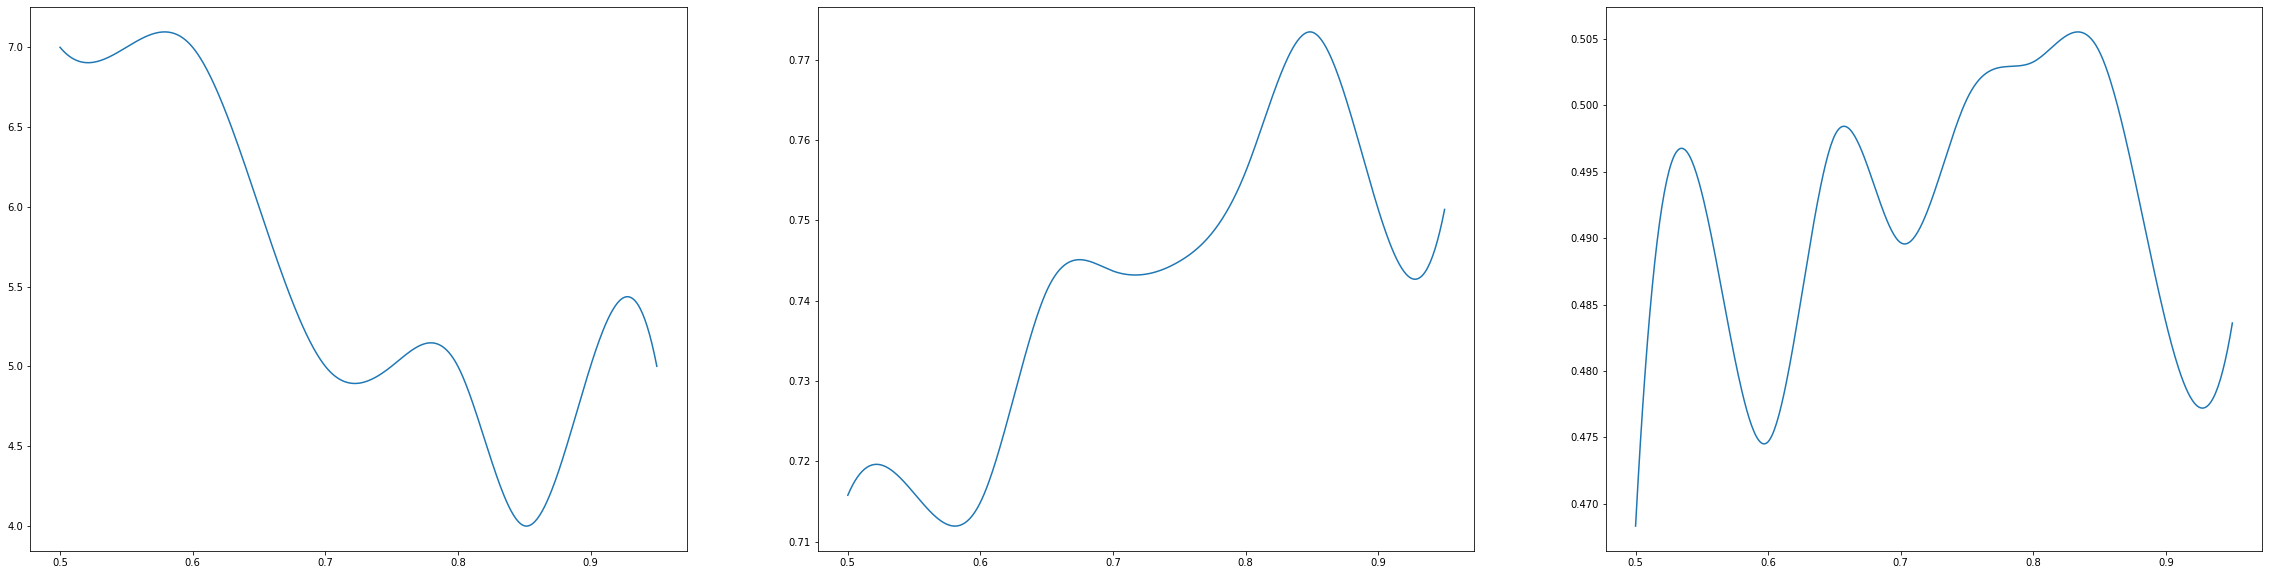

In [7]:
Sil = []
Rand = []
Damping = []
Clusters = []
from scipy.interpolate import make_interp_spline
from sklearn.metrics import silhouette_score
for z in range(10,20,1):
    af = AffinityPropagation(preference=-50, random_state=0, damping = z/20).fit(X)
    cluster_centers_indices = af.cluster_centers_indices_
    labels = af.labels_
    k = silhouette_score(X, labels, metric="sqeuclidean")
    Rand_score = metrics.rand_score(labels_true, labels)
    n_clusters_ = len(cluster_centers_indices)
    Sil.append(k)
    Rand.append(Rand_score)
    Damping.append(z/20)
    Clusters.append(n_clusters_)
    print("For damping Value %.2f" % (z/20),":  %d" % n_clusters_,", Silhouette Score : %.2f" % k,", Rand Score : %.2f" % Rand_score)

# TO MAKE ARRAY
Dampnp = np.array(Damping)
Clustersnp =np.array(Clusters)
Randnp= np.array(Rand)
Silnp=np.array(Sil)


# plotting some points and to make the plot smoother I'm using 'make_interp_spline'
D_C = make_interp_spline(Dampnp, Clustersnp)
D_R = make_interp_spline(Dampnp, Randnp)
D_S = make_interp_spline(Dampnp, Silnp)


X_ = np.linspace(Dampnp.min(), Dampnp.max(), 500)
W_ = D_C(X_)
Y_ = D_R(X_)
Z_ = D_S(X_)

f = plt.figure()
f.set_figwidth(40)
f.set_figheight(10)

plt.subplot(1,3,1);
plt.plot(X_, W_);
plt.subplot(1,3,2);
plt.plot(X_, Y_);
plt.subplot(1,3,3);
plt.plot(X_, Z_);
plt.show()